In [2]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import csv
import lmfit
from scipy import stats

In [340]:
def loadfile(iFile):
    label=iFile
    lifetime=np.array([])
    e0=np.array([])
    c0=np.array([])
    c1=np.array([])
    val=float(0)
    count=-1
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            count = count+1
            if count % 5 == 0:
                print("progress",count)
            if count > 2120:
                break
            first=True
            e0r=np.array([])
            c0r=np.array([])
            c1r=np.array([])
            for pVal in row:
                if '\t' in pVal:
                    #print("Tab")
                    first=False
                if first:
                    e0r     = np.append(e0r,float(val))
                    c0r     = np.append(c0r,float(pVal))
                else:
                    try:
                        c1r     = np.append(c1r,float(pVal))
                    except ValueError:
                        continue
                val=val+1
            #val0=checkThresh(c0r,-0.022)
            #val1=checkThresh(c1r,-0.011)
            #if len(val0) > 0 and len(val1) > 0 and abs(val0[0]- val1[0]) > 20 :
            dt,max0,max1=checkAll(c0r,-0.022,c1r,-0.011)
            if dt > 0:
                #f = open("skim_update.txt", "a+")
                #f.write(','.join(row))
                #f.write('\n')
                #f.close()
                lifetime = np.append(lifetime,dt)
                try:
                    e0 = np.vstack((e0,e0r))
                    c0 = np.vstack((c0,c0r))
                    c1 = np.vstack((c1,c1r))
                except ValueError:
                    e0 = e0r
                    c0 = c0r
                    c1 = c1r
    return e0,c0,c1,lifetime
label='skim_tmp.txt'
x,y0,y1,life=loadfile(label)

progress 0
2 DW Events [1156]
2 DW Events [879]
2 DW Events [1760]
2 DW Events [1748]
2 DW Events [3219]
progress 5
2 DW Events [6794]
2 DW Events [6705]
Double Pulse 1:  [109]
2 DW Events [1466]
2 DW Events [2242]
progress 10
2 DW Events [4143]
2 DW Events [2406]
Double Pulse 0:  [181]
2 DW Events [30]
2 DW Events [4800]
progress 15
2 DW Events [2497]
2 DW Events [4825]
2 DW Events [4031]
2 DW Events [852]
2 DW Events [3774]
progress 20
2 DW Events [5445]
2 DW Events [1653]
2 DW Events [3396]
2 DW Events [4829]
2 DW Events [3172]
progress 25
2 DW Events [4140]
2 DW Events [323]
2 DW Events [1695]
2 DW Events [4108]
2 DW Events [2574]
progress 30
2 DW Events [1324]
2 DW Events [1029]
2 DW Events [3478]
2 DW Events [474]
2 DW Events [421]
progress 35
2 DW Events [6557]
2 DW Events [3289]
2 DW Events [4033]
2 DW Events [3388]
2 DW Events [4009]
progress 40
2 DW Events [782]
2 DW Events [3111]
2 DW Events [135]
2 DW Events [2856]
2 DW Events [4309]
progress 45
Double Pulse 0:  [304]
2 DW 

2 DW Events [3111]
2 DW Events [135]
2 DW Events [2856]
2 DW Events [4309]
Double Pulse 0:  [304]
progress 385
2 DW Events [995]
2 DW Events [1243]
2 DW Events [244]
2 DW Events [1523]
2 DW Events [2256]
progress 390
2 DW Events [4041]
2 DW Events [6495]
2 DW Events [43]
2 DW Events [450]
2 DW Events [5648]
progress 395
2 DW Events [3701]
2 DW Events [6684]
2 DW Events [1506]
2 DW Events [4687]
2 DW Events [319]
progress 400
2 DW Events [4517]
Double Pulse 0:  [174]
2 DW Events [424]
2 DW Events [3520]
2 DW Events [426]
progress 405
2 DW Events [5803]
2 DW Events [585]
Double Pulse 1:  [264]
2 DW Events [2304]
2 DW Events [111]
progress 410
2 DW Events [2302]
2 DW Events [5347]
2 DW Events [5910]
2 DW Events [290]
2 DW Events [3703]
progress 415
2 DW Events [951]
2 DW Events [1451]
2 DW Events [1737]
2 DW Events [3037]
2 DW Events [349]
progress 420
2 DW Events [3582]
2 DW Events [6536]
2 DW Events [3124]
2 DW Events [798]
2 DW Events [5212]
progress 425
2 DW Events [2788]
2 DW Events 

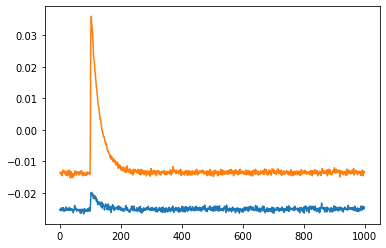

(163840,)


In [91]:
val=2*4+1
#y0 += 0.025
plt.plot(y0[val*4096-100:(val*4096+900)])
plt.plot(y1[val*4096-100:(val*4096+900)])
plt.show()

print(y0.shape)

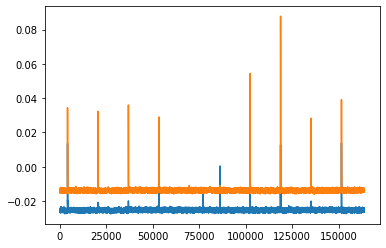

In [62]:
plt.plot(y0)
plt.plot(y1)
plt.show()


In [4]:
def checkThresh(iD,iVal):
    #res = list(map(lambda i: i> iVal, iD))
    res=np.argwhere(iD > iVal)
    res1=[]
    if len(res) > 0:
        res1.append(res[0])
        old  = res1[0]
        for pVal in res:
            if pVal < old+20:
                old = pVal
                continue
            res1.append(pVal)
            old = pVal
    return res1
    

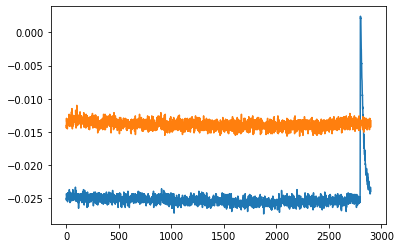

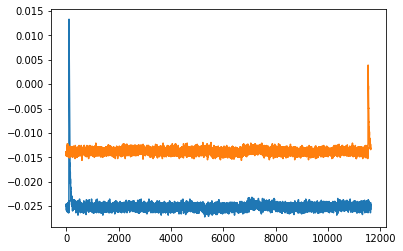

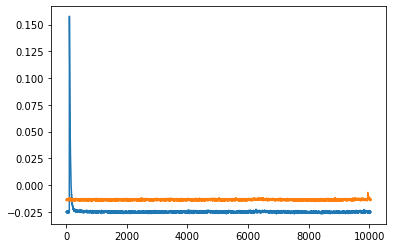

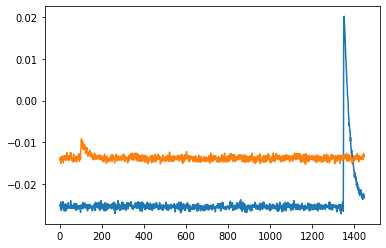

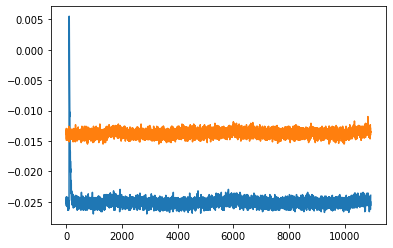

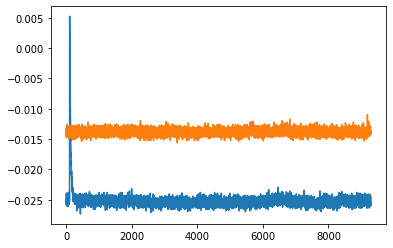

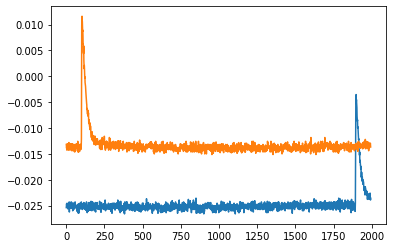

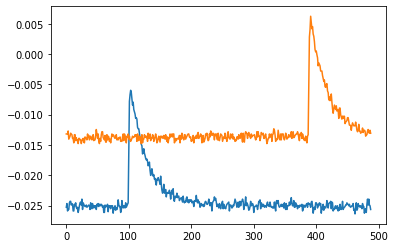

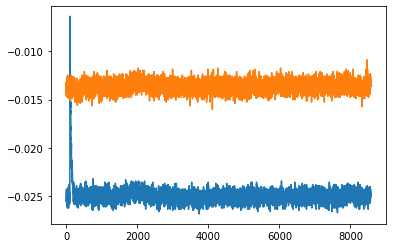

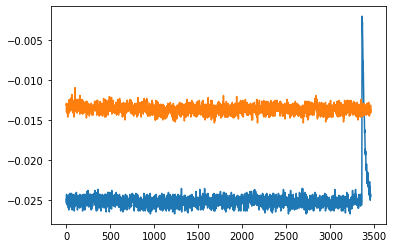

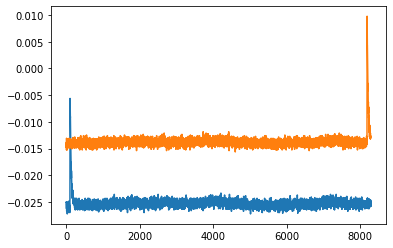

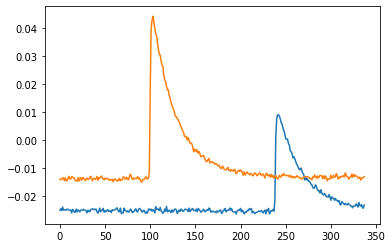

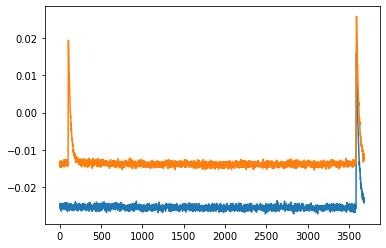

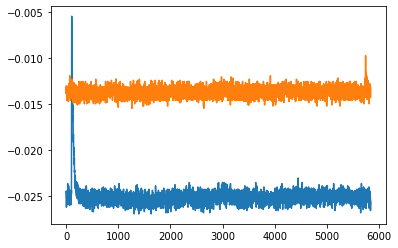

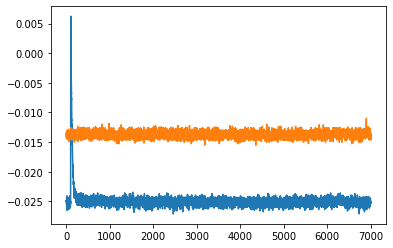

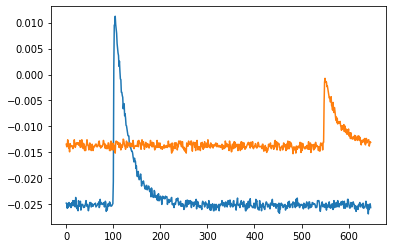

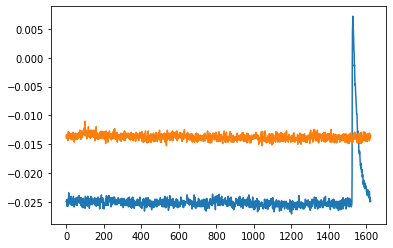

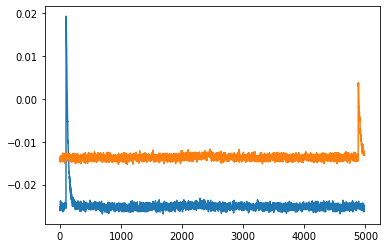

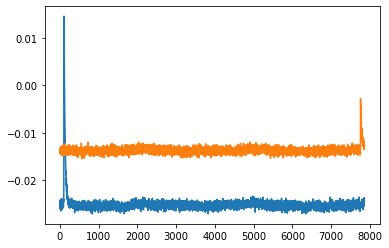

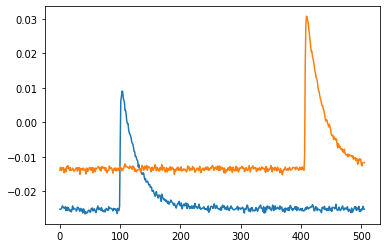

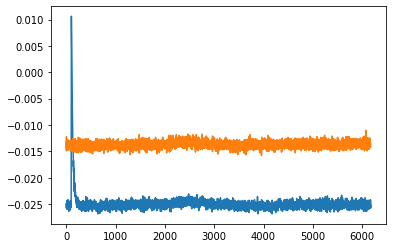

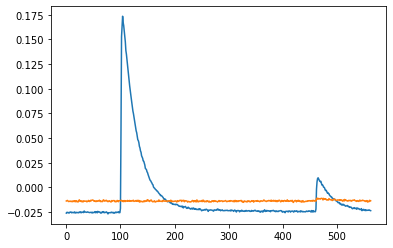

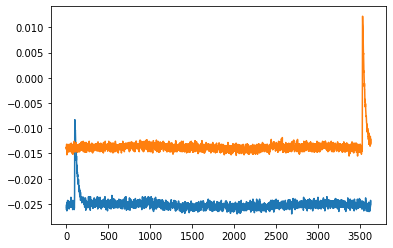

In [17]:
for i in range(len(y0)):
    val0=checkThresh(y0[i],-0.022)
    val1=checkThresh(y1[i],-0.011)
    xmin = int(min(val0[0],val1[0])-100)
    xmax = int(max(val0[0],val1[0])+100)
    plt.plot(y0[i][xmin:xmax])
    plt.plot(y1[i][xmin:xmax])
    plt.show()


[array([4096]), array([4211])]


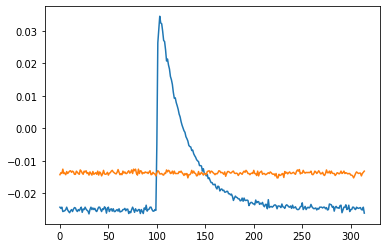

[array([4096]), array([4446]), array([4498])]


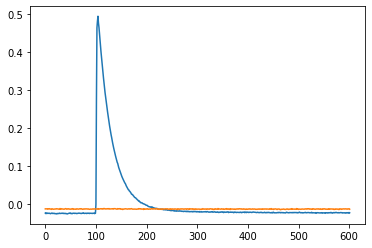

[array([4095]), array([4353])]


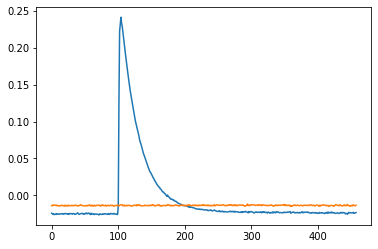

[array([4096]), array([4248])]


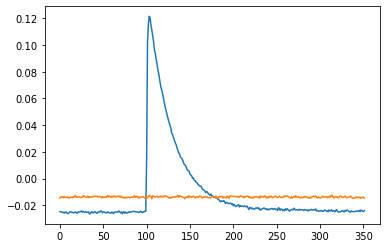

[array([4096]), array([4281])]


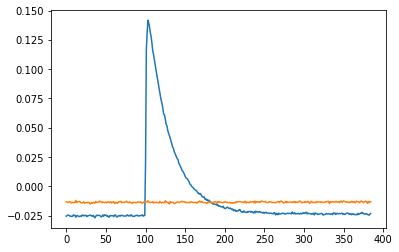

[array([4095]), array([4178])]


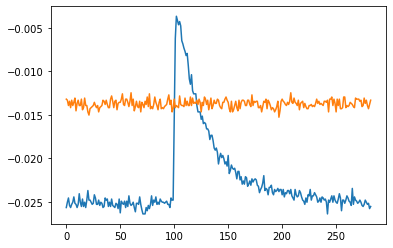

[array([4095]), array([4428])]


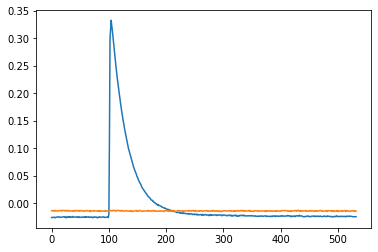

[array([4095]), array([4218])]


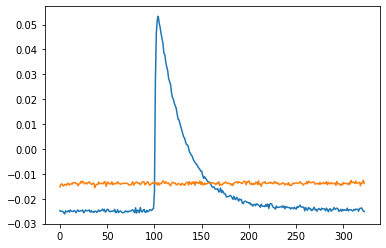

[array([4095]), array([12201])]


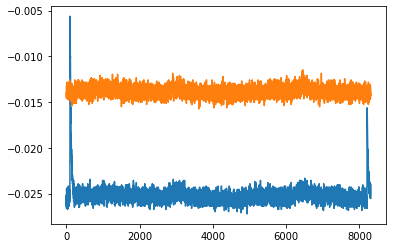

[array([4096]), array([4478])]


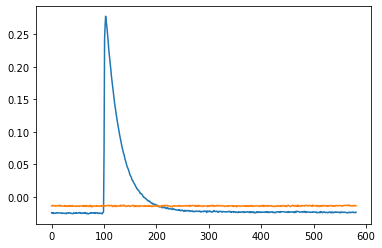

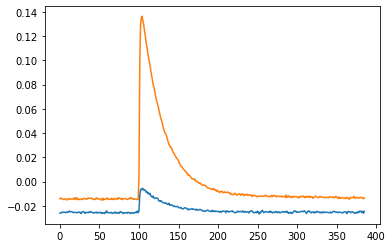

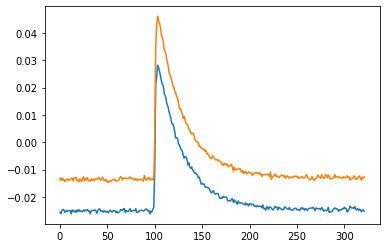

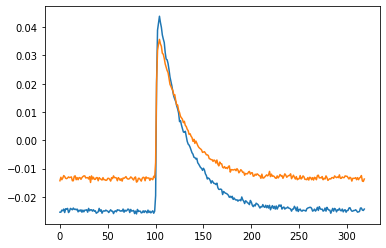

[array([4095]), array([4187])]


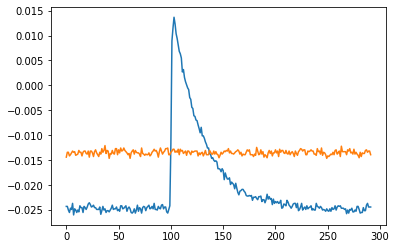

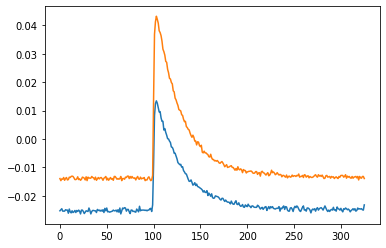

[array([4095]), array([4293])]


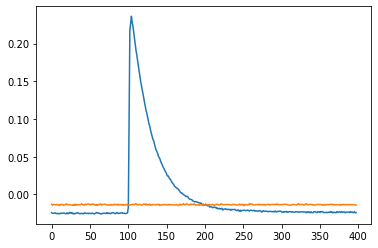

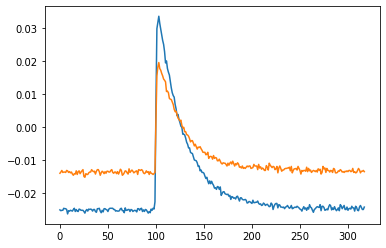

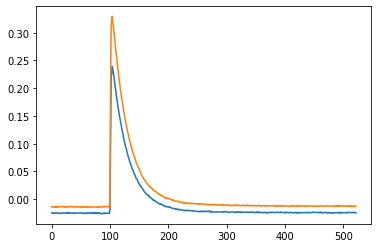

[array([4095]), array([4319])]


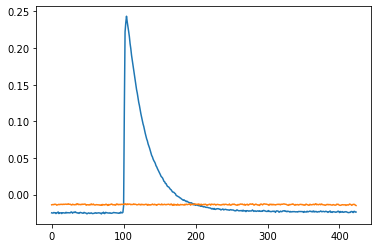

[array([4096]), array([4338])]


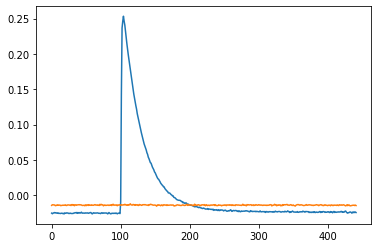

[array([4096]), array([4272])]


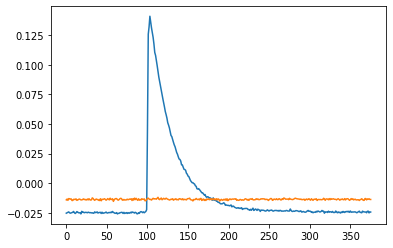

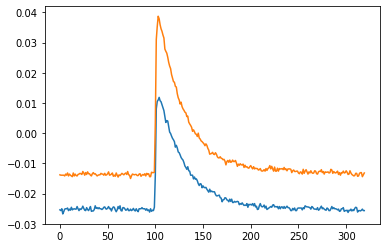

[array([4096]), array([8185])]


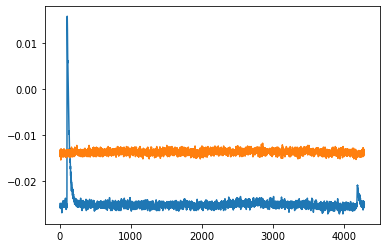

[array([4096]), array([4388])]


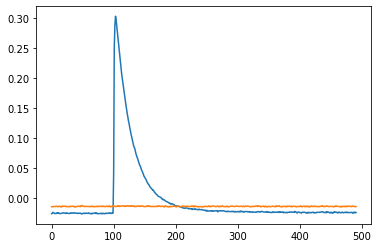

[array([4096]), array([4295]), array([4327])]


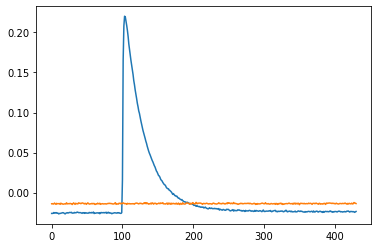

[array([4096]), array([4242])]


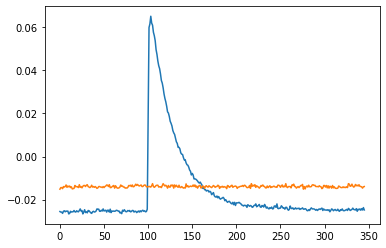

[array([4095]), array([4168])]


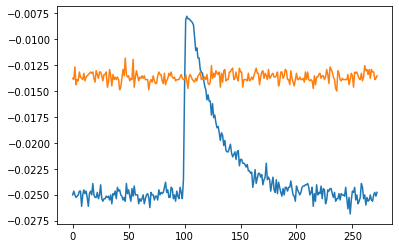

[array([4095]), array([4222])]


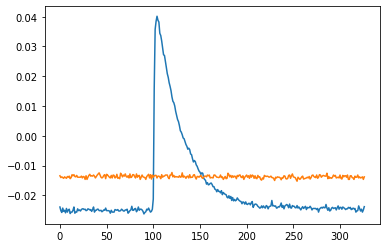

[array([4096]), array([4240])]


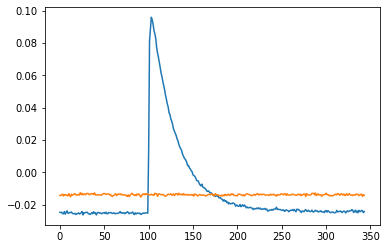

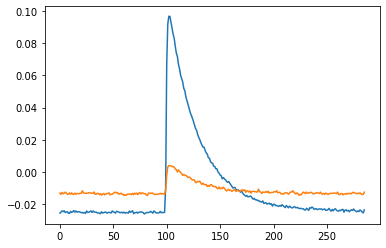

[array([4096]), array([4363]), array([4418])]


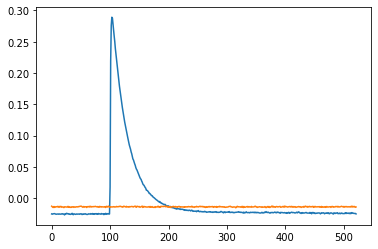

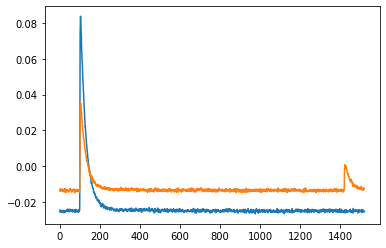

[array([4096]), array([4588])]


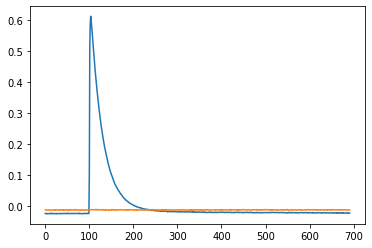

[array([4095]), array([4250])]


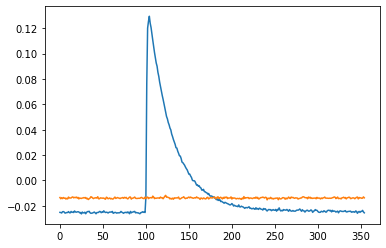

[array([4095]), array([6123])]


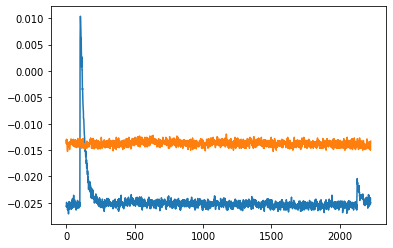

[array([4096]), array([4311]), array([4337]), array([4477])]


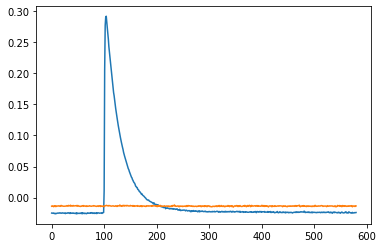

[array([4096]), array([4213])]


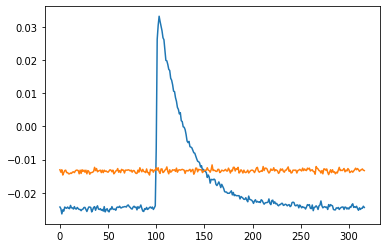

[array([4096]), array([4258])]


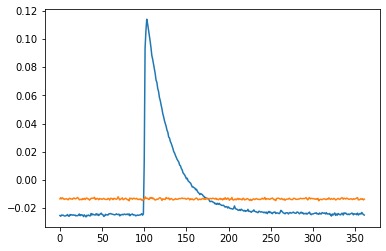

[array([4095]), array([4228])]


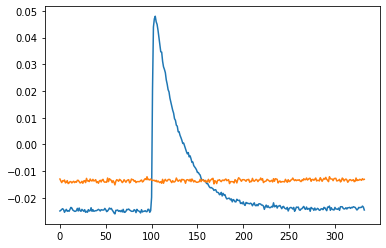

[array([4095]), array([4326])]


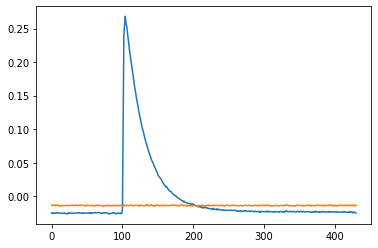

[array([4096]), array([4298])]


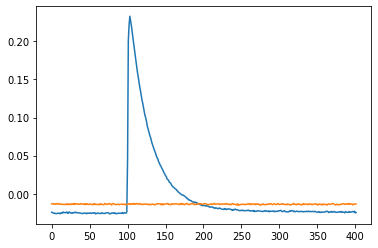

[array([4096]), array([4218])]


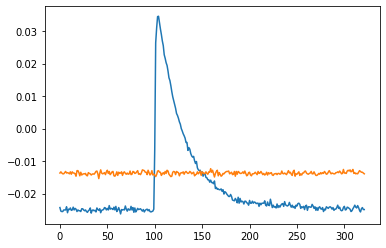

[array([4095]), array([4210])]


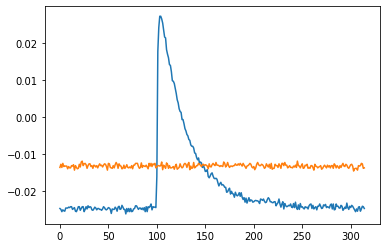

[array([4096]), array([4215])]


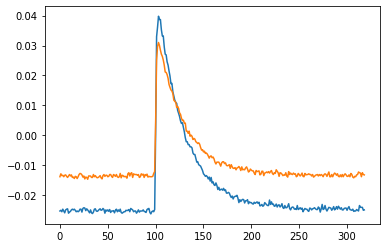

[array([4096]), array([4234])]


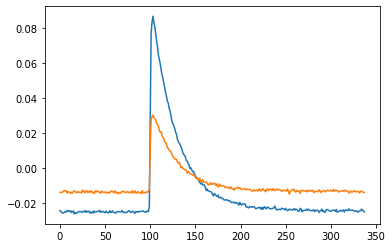

[array([4096]), array([4220])]


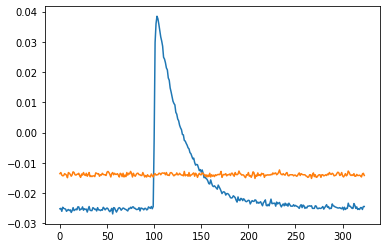

[array([4095]), array([4254])]


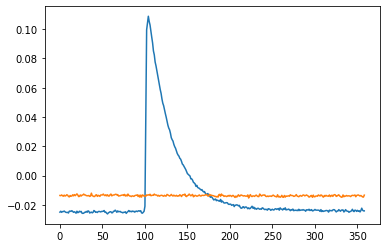

[array([4095]), array([4201])]


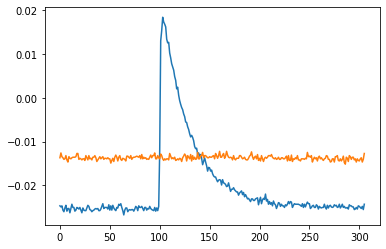

[array([4096]), array([4282])]


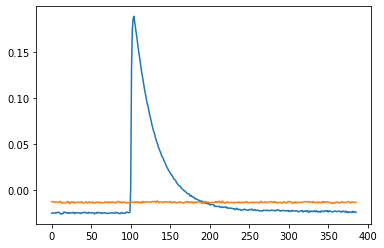

[array([4096]), array([4195])]


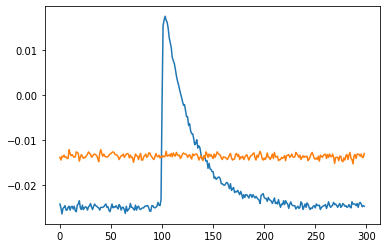

[array([4095]), array([4199])]


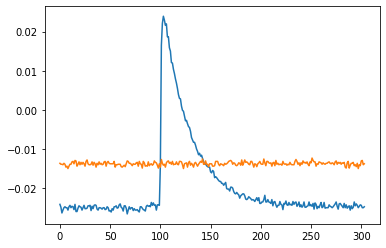

[array([4095]), array([4200])]


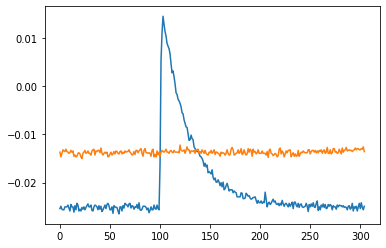

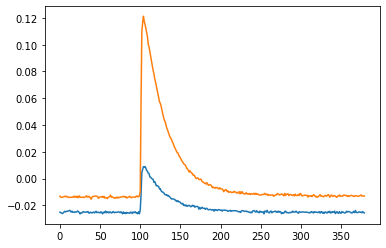

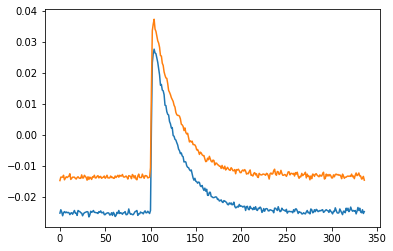

[array([4095]), array([4207])]


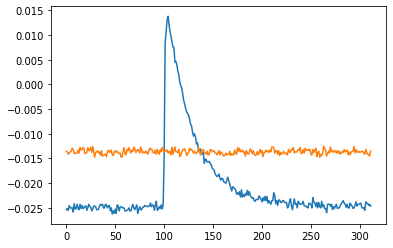

[array([4095]), array([4218])]


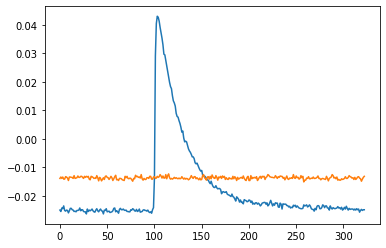

[array([4095]), array([4315])]


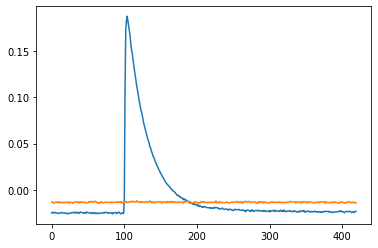

[array([4095]), array([4222])]


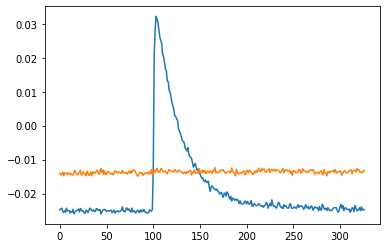

[array([4095]), array([4346]), array([4386]), array([4424])]


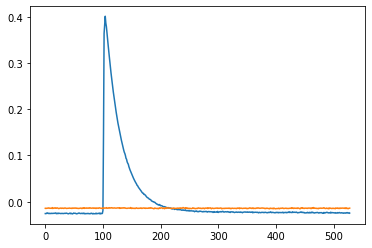

[array([4096]), array([4318])]


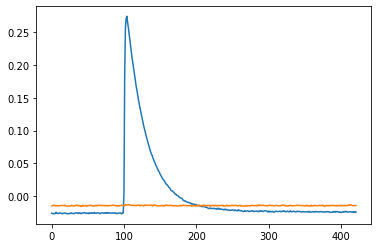

[array([4096]), array([4305])]


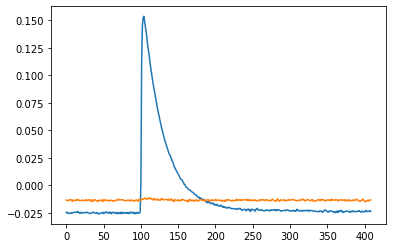

[array([4095]), array([4254])]


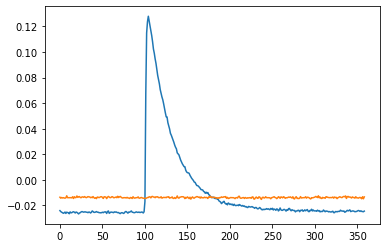

[array([4096]), array([4285])]


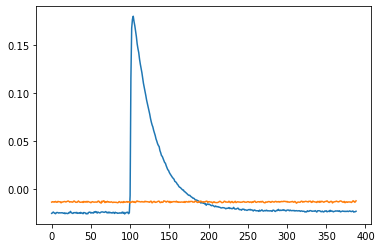

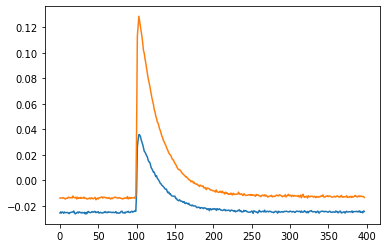

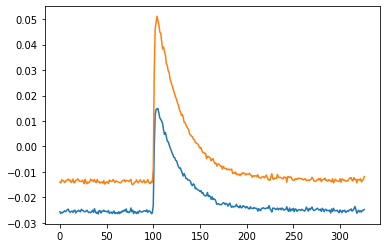

[array([4095]), array([4338])]


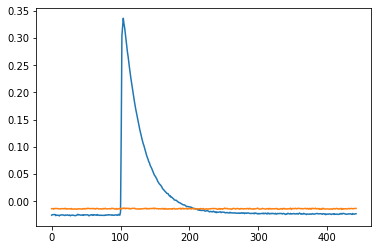

[array([4096]), array([4320]), array([4350])]


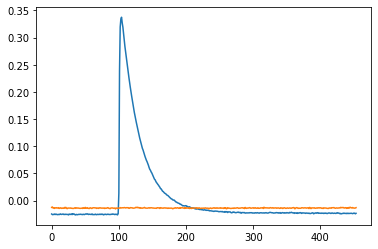

[array([4096]), array([4321])]


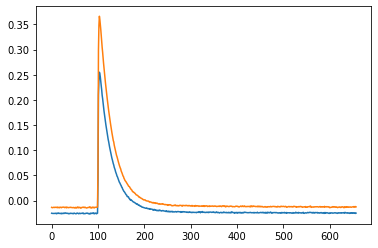

[array([4095]), array([4175])]


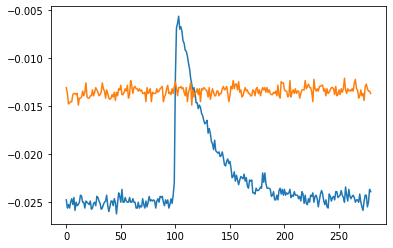

[array([4096]), array([4249])]


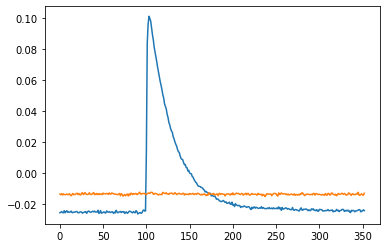

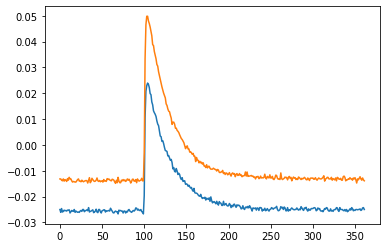

[array([4095]), array([13038])]


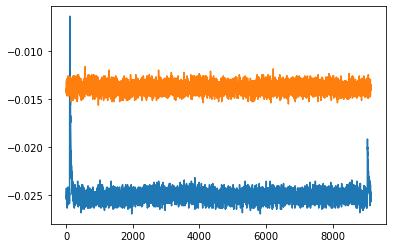

[array([4096]), array([4187])]


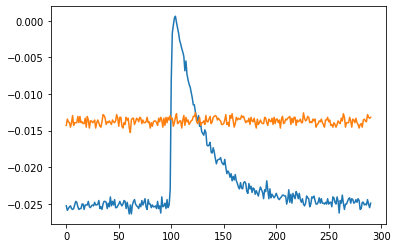

[array([4095]), array([9795])]


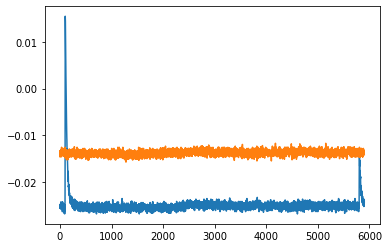

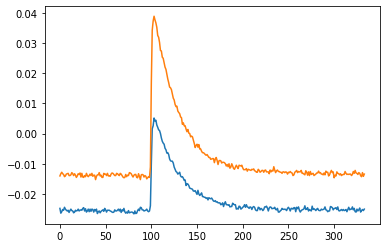

[array([4095]), array([4227])]


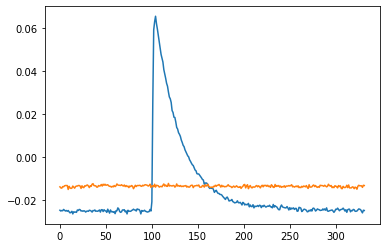

[array([4095]), array([4191])]


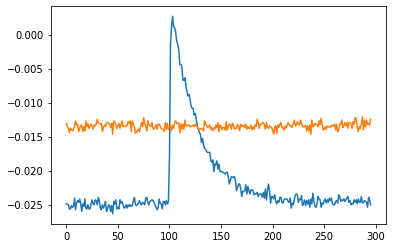

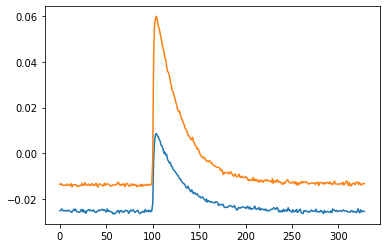

[array([4096]), array([4289])]


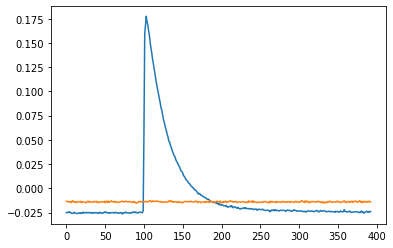

[array([4096]), array([4233])]


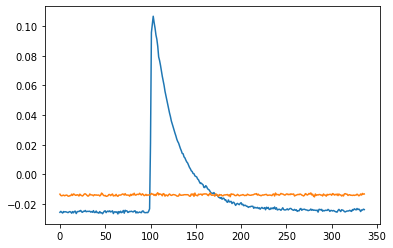

[array([4096]), array([4287])]


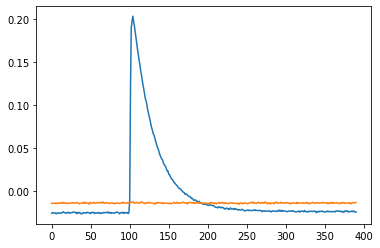

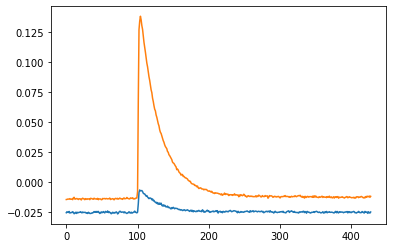

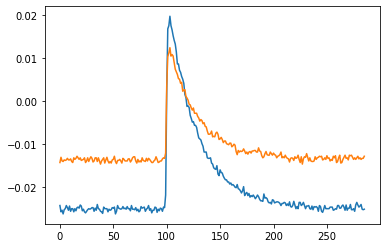

[array([4095]), array([4411]), array([4436])]


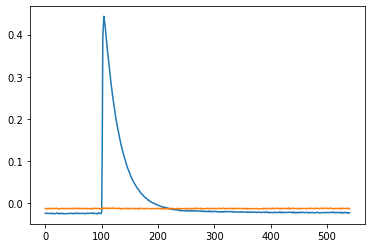

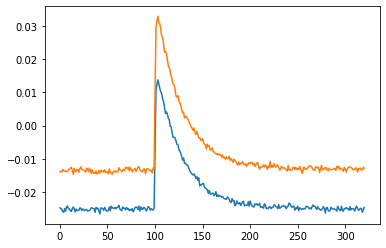

[array([4096]), array([4705])]


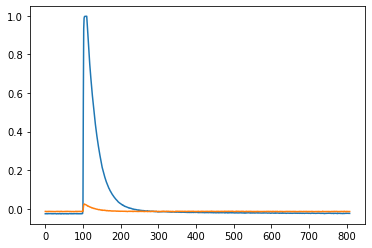

[array([109]), array([4096])]


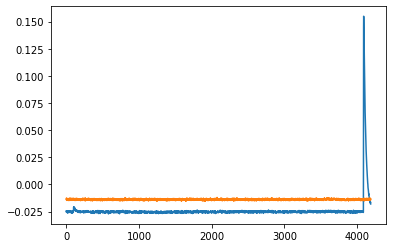

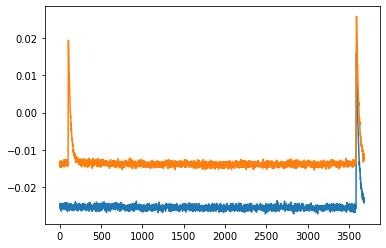

[array([4095]), array([4174])]


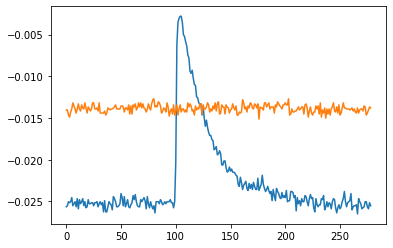

[array([4096]), array([4314])]


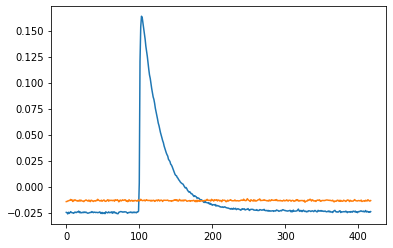

[array([4096]), array([4317]), array([4355])]


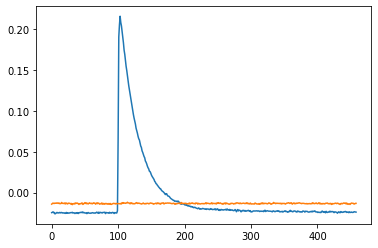

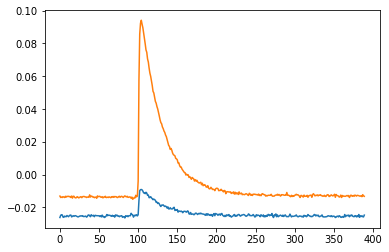

[array([4095]), array([4323])]


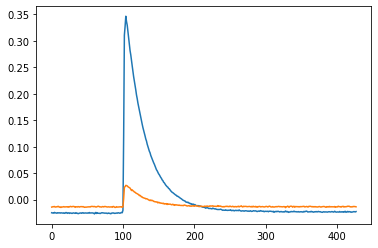

[array([4096]), array([4315])]


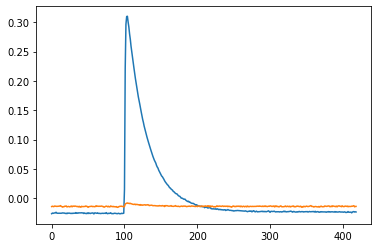

[array([4095]), array([4178])]


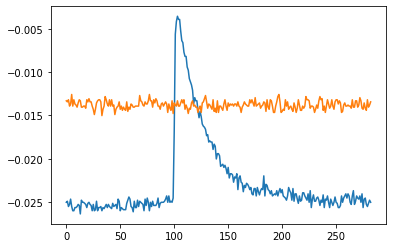

[array([4095]), array([11579])]


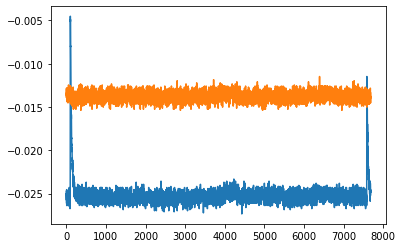

[array([4095]), array([4369]), array([4412]), array([4523])]


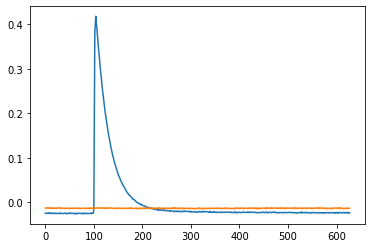

[array([4096]), array([4445]), array([4484]), array([4604])]


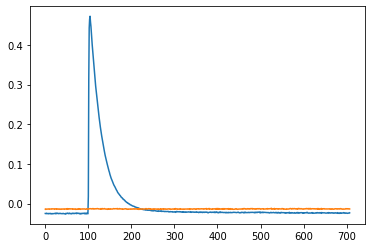

[array([4096]), array([4564])]


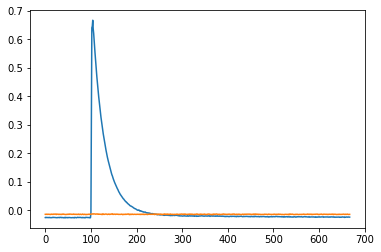

[array([4096]), array([4331])]


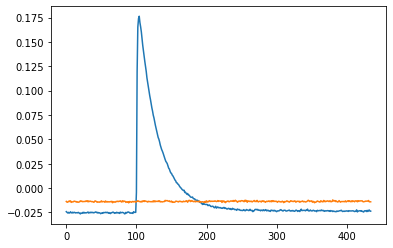

[array([4095]), array([4200])]


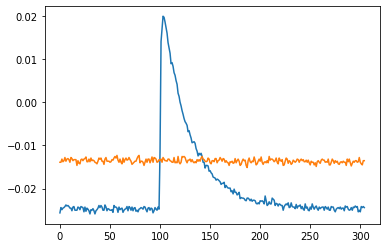

[array([4096]), array([4257])]


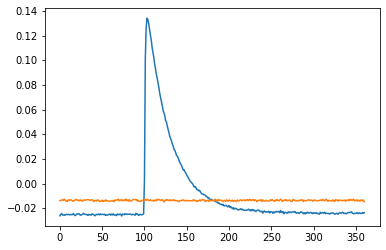

[array([4095]), array([4177])]


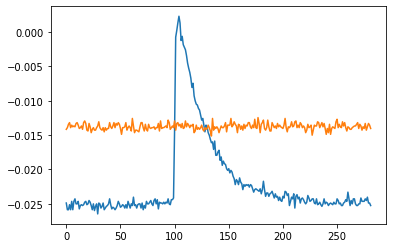

[array([4096]), array([4369]), array([4410])]


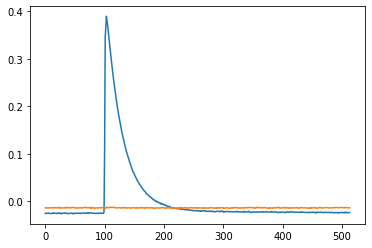

[array([4096]), array([4300])]


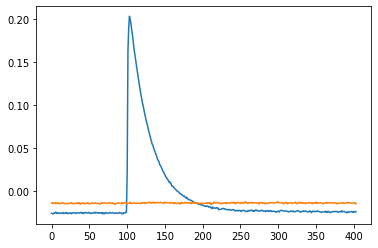

[array([4095]), array([4282])]


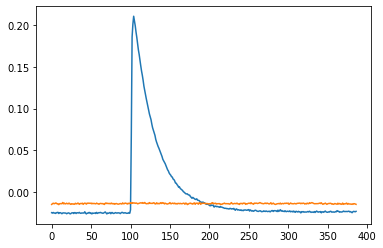

[array([4096]), array([4320])]


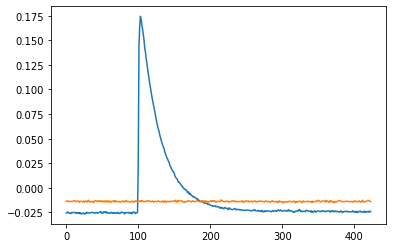

[array([4096]), array([4329])]


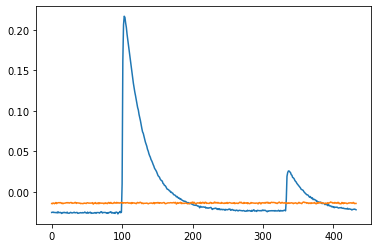

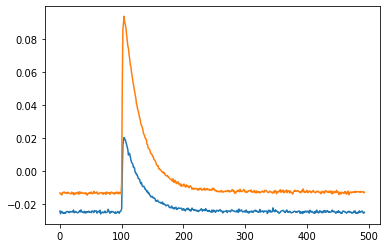

[array([4096]), array([4226])]


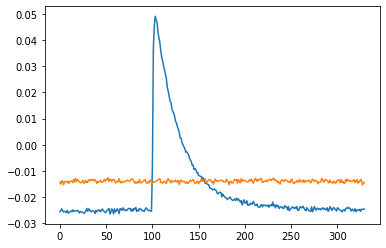

[array([4096]), array([4324])]


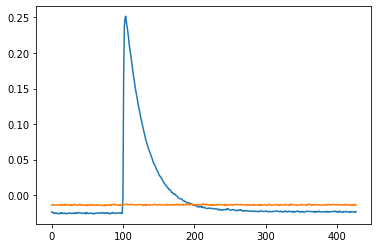

[array([4096]), array([4207])]


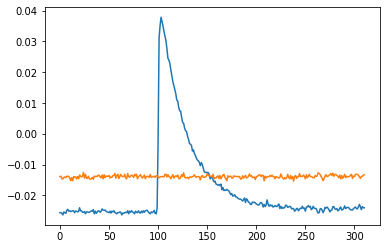

[array([4096]), array([4187])]


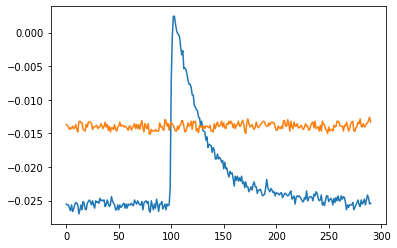

[array([4096]), array([4383])]


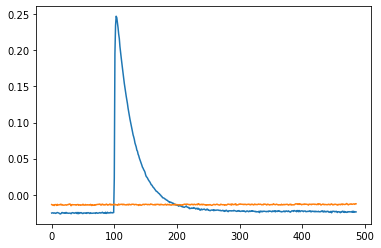

[array([4095]), array([4274]), array([4456])]


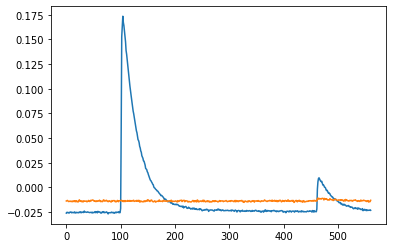

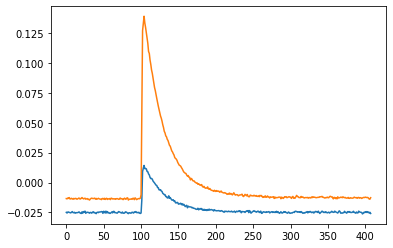

[array([4095]), array([4309])]


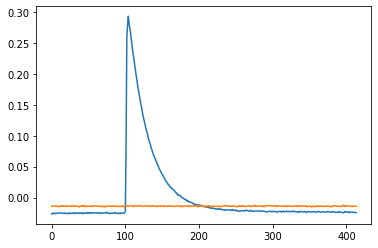

[array([4095]), array([4230])]


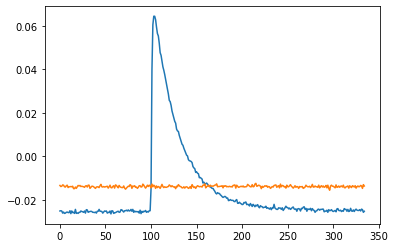

[array([4096]), array([4182])]


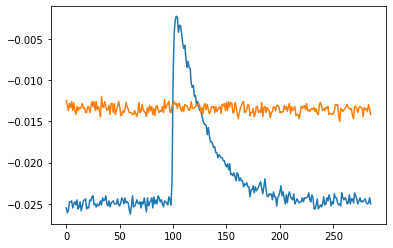

[array([4096]), array([4273])]


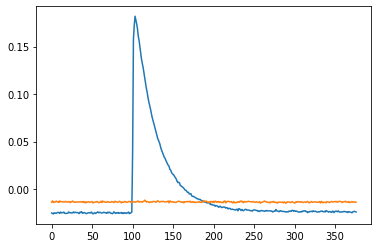

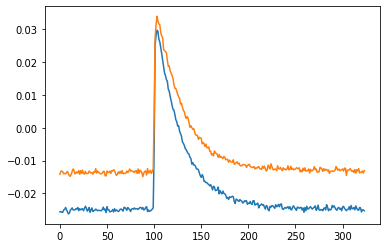

[array([4096]), array([4266])]


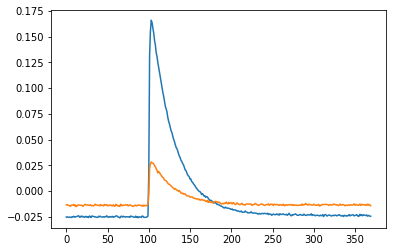

[array([4096]), array([4256])]


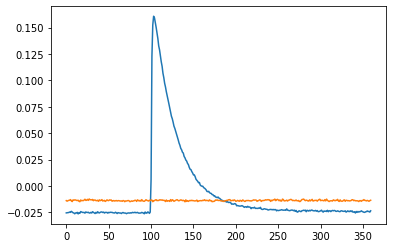

[array([4096]), array([4264])]


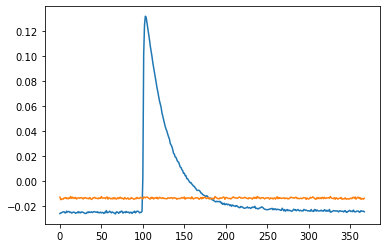

[array([4094]), array([4167])]


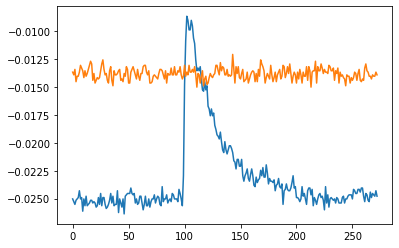

[array([4096]), array([4321]), array([4396])]


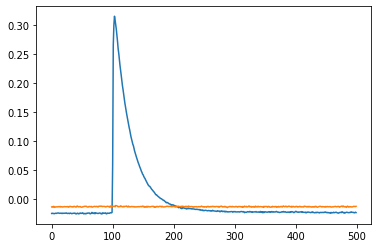

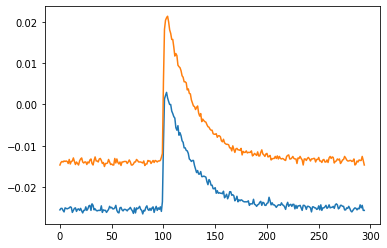

[array([4096]), array([4332])]


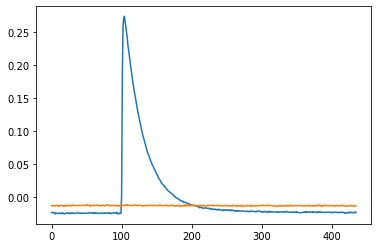

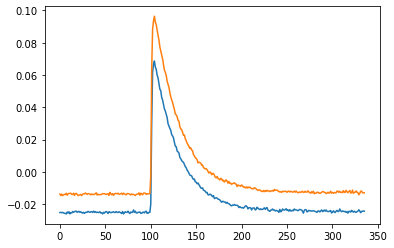

[array([4095]), array([4347]), array([4389])]


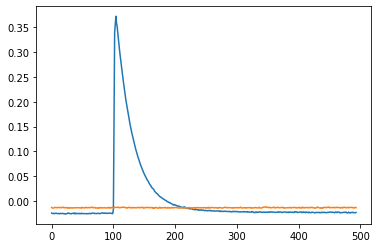

[array([4095]), array([4179])]


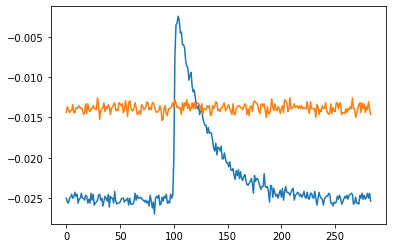

[array([4095]), array([4231])]


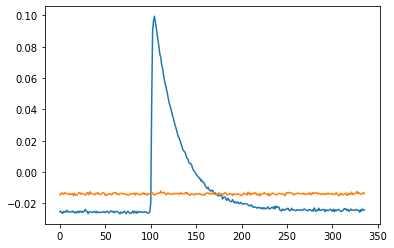

In [23]:
for i in range(len(y0)):
    val0=checkThresh(y0[i],-0.022)
    val1=checkThresh(y1[i],-0.011)
    xmin=0
    xmax=16384
    if len(val0) > 1:
        print(val0)
        xmin = int(val0[0]-100)
        xmax = int(val0[-1]+100) 
    if len(val1) > 1:
        xmin = int(val1[0]-100)
        xmax = int(val1[-1]+100) 
    #xmin = int(min(val0[0],val1[0])-100)
    #xmax = int(max(val0[0],val1[0])+100)
    plt.plot(y0[i][xmin:xmax])
    plt.plot(y1[i][xmin:xmax])
    plt.show()


In [215]:
def doublePulse(iD,iVal,dMin=0.001):
    res=checkThresh(iD,iVal)
    if len(res)  < 2:
        return -1,-1,-1
    if iD[int(res[-1])+2] < iVal:
        return -1,-1,-1
    minimum=np.min(iD[int(res[0]):int(res[-1])])
    baseline=np.average(iD[0:3000])
    if abs(minimum-baseline) > dMin:
        return -1,-1,-1
    return (res[-1]-res[0]),np.max(iD[int(res[0]):int(res[0])+10])-baseline,np.max(iD[int(res[-1]):int(res[-1])+10])-baseline

def checkAll(iD0,iVal0,iD1,iVal1):
    val0,max00,max01=doublePulse(iD0,iVal0)
    val1,max10,max11=doublePulse(iD1,iVal1)
    if val0 > 0: 
        print("Double Pulse 0: ",val0)
        return val0,max00,max01
    if val1 > 0: 
        print("Double Pulse 1: ",val1)
        return val1,max10,max11
    val0s=checkThresh(iD0,iVal0)
    val1s=checkThresh(iD1,iVal1)
    if len(val0s) > 0 and len(val1s) > 0 and abs(val0s[0]- val1s[0]) > 20 and abs(val0s[0]- val1s[0]) < 7000 :
        print("2 DW Events",abs(val0s[0]- val1s[0]))
        max0=np.max(iD0[int(val0s[0]):int(val0s[0]+10)])-np.average(iD0[0:3000])
        max1=np.max(iD1[int(val1s[0]):int(val1s[0]+10)])-np.average(iD1[0:3000])
        omax0=max0
        omax1=max1
        if val0s[0] < val1s[0]:
            omax0=max1
            omax1=max0
        return abs(val0s[0]- val1s[0]),omax0,omax1
    return -1,-1,-1
    

[361]


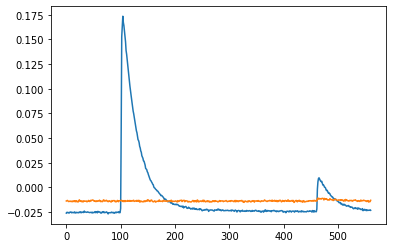

In [84]:
for i in range(len(y0)):
    val0=doublePulse(y0[i],-0.022)
    val1=doublePulse(y1[i],-0.011)
    xmin=0
    xmax=16384
    if val0 > 0:
        print(val0)
        res=checkThresh(y0[i],-0.022)
        xmin = int(res[0]-100)
        xmax = int(res[-1]+100) 
    if val1 > 0:
        res=checkThresh(y1[i],-0.011)
        print(val1)
        xmin = int(res[0]-100)
        xmax = int(res[-1]+100) 
    #xmin = int(min(val0[0],val1[0])-100)
    #xmax = int(max(val0[0],val1[0])+100)
    if val0 > 0 or val1 >0:
        plt.plot(y0[i][xmin:xmax])
        plt.plot(y1[i][xmin:xmax])
        plt.show()

maxf: 0.04344960486666667
maxb: 0.006879028866666665
Lifetime 1760.0 maxb: 0.006879028866666665 maxf: 0.04344960486666667
maxf: 0.05210579643333334
maxb: 0.07445216553333332
Lifetime 1748.0 maxb: 0.07445216553333332 maxf: 0.05210579643333334
maxf: 0.04072478586666667
maxb: 0.020398367599999998
Lifetime 30.0 maxb: 0.020398367599999998 maxf: 0.04072478586666667
maxf: 0.019639353133333332
maxb: 0.007405777766666665
Lifetime 421.0 maxb: 0.007405777766666665 maxf: 0.019639353133333332
maxf: 0.03190092273333334
maxb: 0.007713402699999998
Lifetime 135.0 maxb: 0.007713402699999998 maxf: 0.03190092273333334
dmaxf: 0.13526643213333334
dmaxb: 0.023934692133333334
Lifetime 304.0 maxb: 0.023934692133333334 maxf: 0.13526643213333334
maxf: 0.018745043733333334
maxb: 0.010364322366666666
Lifetime 1243.0 maxb: 0.010364322366666666 maxf: 0.018745043733333334
maxf: 0.03745537681333333
maxb: 0.05883296643333333
Lifetime 1506.0 maxb: 0.05883296643333333 maxf: 0.03745537681333333
maxf: 0.06149893303333333
m

maxf: 0.06149893303333333
maxb: 0.026514484700000004
Lifetime 319.0 maxb: 0.026514484700000004 maxf: 0.06149893303333333
maxf: 0.029860247
maxb: 0.10656570383333333
Lifetime 424.0 maxb: 0.10656570383333333 maxf: 0.029860247
maxf: 0.14092671366666668
maxb: 0.0564081422
Lifetime 585.0 maxb: 0.0564081422 maxf: 0.14092671366666668
maxf: 0.025022209566666665
maxb: 0.024743869266666663
Lifetime 2302.0 maxb: 0.024743869266666663 maxf: 0.025022209566666665
maxf: 0.026643145629333335
maxb: 0.03402386263333333
Lifetime 1737.0 maxb: 0.03402386263333333 maxf: 0.026643145629333335
maxf: 0.009656786433333335
maxb: 0.024173551433333336
Lifetime 728.0 maxb: 0.024173551433333336 maxf: 0.009656786433333335
dmaxf: 0.06458202296666667
dmaxb: 0.040167222966666666
Lifetime 366.0 maxb: 0.040167222966666666 maxf: 0.06458202296666667
maxf: 0.006400788033333334
maxb: 0.005972058399999999
Lifetime 2464.0 maxb: 0.005972058399999999 maxf: 0.006400788033333334
dmaxf: 0.10422757803333334
dmaxb: 0.02378077803333333
L

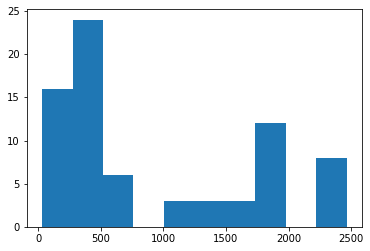

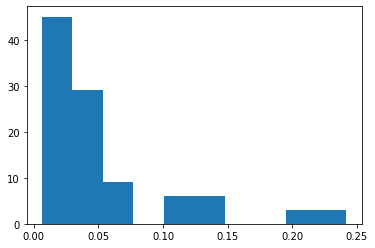

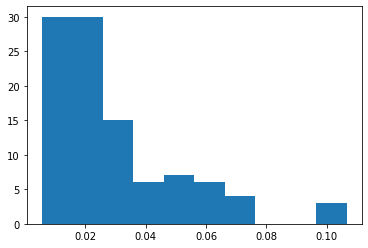

0.05291326577365678
0.029548168165676573


In [361]:
cleanedlife=np.array([])
maxfront=np.array([])
maxback=np.array([])
for i in range(len(y0)):
    if life[i] > 2500:# or life[i] < 150:
        continue
    val0=checkThresh(y0[i],-0.020)
    val1=checkThresh(y1[i],-0.008)
    val0l,max00,max01=doublePulse(y0[i],-0.020)
    val1l,max10,max11=doublePulse(y1[i],-0.008)
    
    if len(val0) > 0 and len(val1) > 0 and abs(val0[0]-val1[0]) > 20:
        xmin = int(min(val0[0],val1[0])-100)
        xmax = int(max(val0[-1],val1[-1])+100)
        max0=np.max(y0[i][int(val0[0]):int(val0[0]+10)])-np.average(y0[i][0:3000])
        max1=np.max(y1[i][int(val1[0]):int(val1[0]+10)])-np.average(y1[i][0:3000])
        omax0=max0
        omax1=max1
        if val0[0] > val1[0]:
            omax0=max1
            omax1=max0
            maxfront = np.append(maxfront,omax0)
            maxback  = np.append(maxback, omax1)
            print("maxf:",omax0)
            print("maxb:",omax1)
        else:
            maxfront = np.append(maxfront,omax0)
            maxback  = np.append(maxback, omax1)
            print("maxf:",omax0)
            print("maxb:",omax1)
    elif len(val0) == 0 and val1l > 0:
        xmin = int(val1[0]-100)
        xmax = int(val1[-1]+100)
        maxfront = np.append(maxfront,max10)
        maxback  = np.append(maxback, max11)
        print("dmaxf:",max10)
        print("dmaxb:",max11)
    elif val0l > 0:
        xmin = int(val0[0]-100)
        xmax = int(val0[-1]+100)
        maxfront = np.append(maxfront,max00)
        maxback  = np.append(maxback, max01)
        print("dmaxf:",max00)
        print("dmaxb:",max01)
    else:
        continue
    if maxback[-1] < 0.04:
        cleanedlife = np.append(cleanedlife,life[i])
    print("Lifetime",life[i],"maxb:",maxback[-1],"maxf:",maxfront[-1])
    #plt.plot(y0[i][xmin:xmax])
    #plt.plot(y1[i][xmin:xmax])
    plt.show()
plt.hist(cleanedlife)
plt.show()
plt.hist(maxfront)
plt.show()
plt.hist(maxback)
plt.show()

#plt.plot(maxback,maxfront)
#plt.show()
print(np.average(maxfront))
print(np.average(maxback))

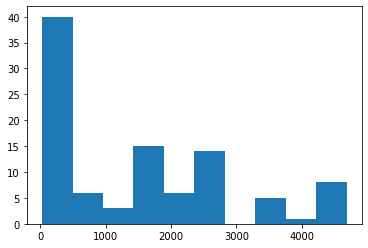

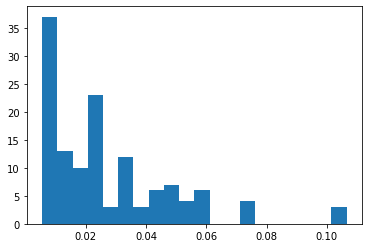

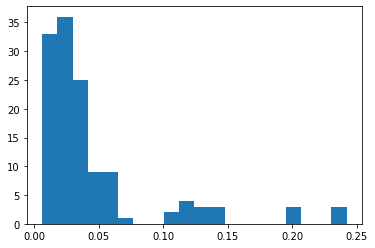

0.027441496506615776 0.04551368269212213


In [357]:
plt.hist(cleanedlife,bins=10)
plt.show()
#plt.plot(maxback,maxfront)

plt.hist(maxback[maxback < 0.3],bins=20)
plt.show()
plt.hist(maxfront[maxfront < 0.3],bins=20)
plt.show()
a0=np.average(maxback [maxback  < 0.9])
a1=np.average(maxfront[maxfront < 0.9])
print(a0,a1)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 8
    # variables        = 3
    chi-square         = 6.19350544
    reduced chi-square = 1.23870109
    Akaike info crit   = 3.95247753
    Bayesian info crit = 4.19080215
[[Variables]]
    a:  54.6171404 +/- 26.9129324 (49.28%) (init = 10)
    b:  1.76331649 +/- 0.79463939 (45.07%) (init = 2.3)
    c:  4.60887475 +/- 1.17168209 (25.42%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.874
    C(b, c) = -0.514
    C(a, c) =  0.320


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

<Figure size 432x288 with 0 Axes>

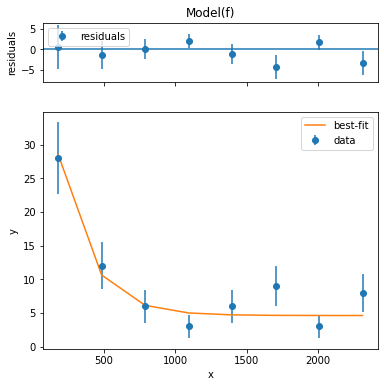

In [367]:
def f(x,a,b,c):
    return a*np.exp(-1*x*0.008/b)+c


import lmfit
points, bin_edges = np.histogram(cleanedlife,bins=8)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
model  = lmfit.Model(f)
p = model.make_params(a=10,b=2.3,c=2)
err=np.array([])
y=np.array([])
x=np.array([])
i0=-1
for pPoint in points:
    i0=i0+1
    if pPoint > 0:
        x=np.append(x,bin_centers[i0])
        y=np.append(y,pPoint)
        err=np.append(err,1./(pPoint**0.5))
    else:
        x=np.append(x,bin_centers[i0])
        y=np.append(y,pPoint)
        err=np.append(err,1./2.)
#print(points,err)
result = model.fit(data=y, params=p, x=x, weights=err)
lmfit.report_fit(result)
plt.figure()
result.plot()
